In [12]:
import pandas as pd
from datetime import timedelta, date
from mysql import connector
import utility
import datetime
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

In [3]:
mydb = connector.connect(user='vignan', password='d@t@b@se',
                             host='127.0.0.1', auth_plugin='mysql_native_password',
                             database='screener')

mycursor = mydb.cursor()

In [4]:
sql = "use screener"
mycursor.execute(sql)
sql = "SELECT timestamp, close FROM daily_data  where Symbol = 'COLPAL'"
df_colpal = pd.read_sql(sql,con=mydb)

In [6]:
print(df_colpal.head())
print(df_colpal.tail())
print(df_colpal.shape)

    timestamp    close
0  2015-06-08  1871.55
1  2015-06-09  1902.90
2  2015-06-10  1898.35
3  2015-06-11  1876.00
4  2015-06-12  1899.50
       timestamp    close
1016  2019-07-16  1134.30
1017  2019-07-17  1167.15
1018  2019-07-18  1203.65
1019  2019-07-19  1173.55
1020  2019-07-22  1164.35
(1021, 2)


/home/vignan/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


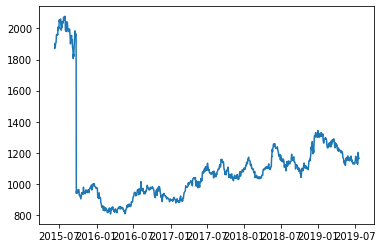

In [8]:
plt.plot(df_colpal['timestamp'], df_colpal['close'])

In [22]:
n=10
df_colpal['min'] = df_colpal.iloc[argrelextrema(df_colpal.close.values, np.less_equal, order=n)[0]]['close']
df_colpal['max'] = df_colpal.iloc[argrelextrema(df_colpal.close.values, np.greater_equal, order=n)[0]]['close']

In [20]:
plt.rcParams["figure.figsize"] = (40,20)

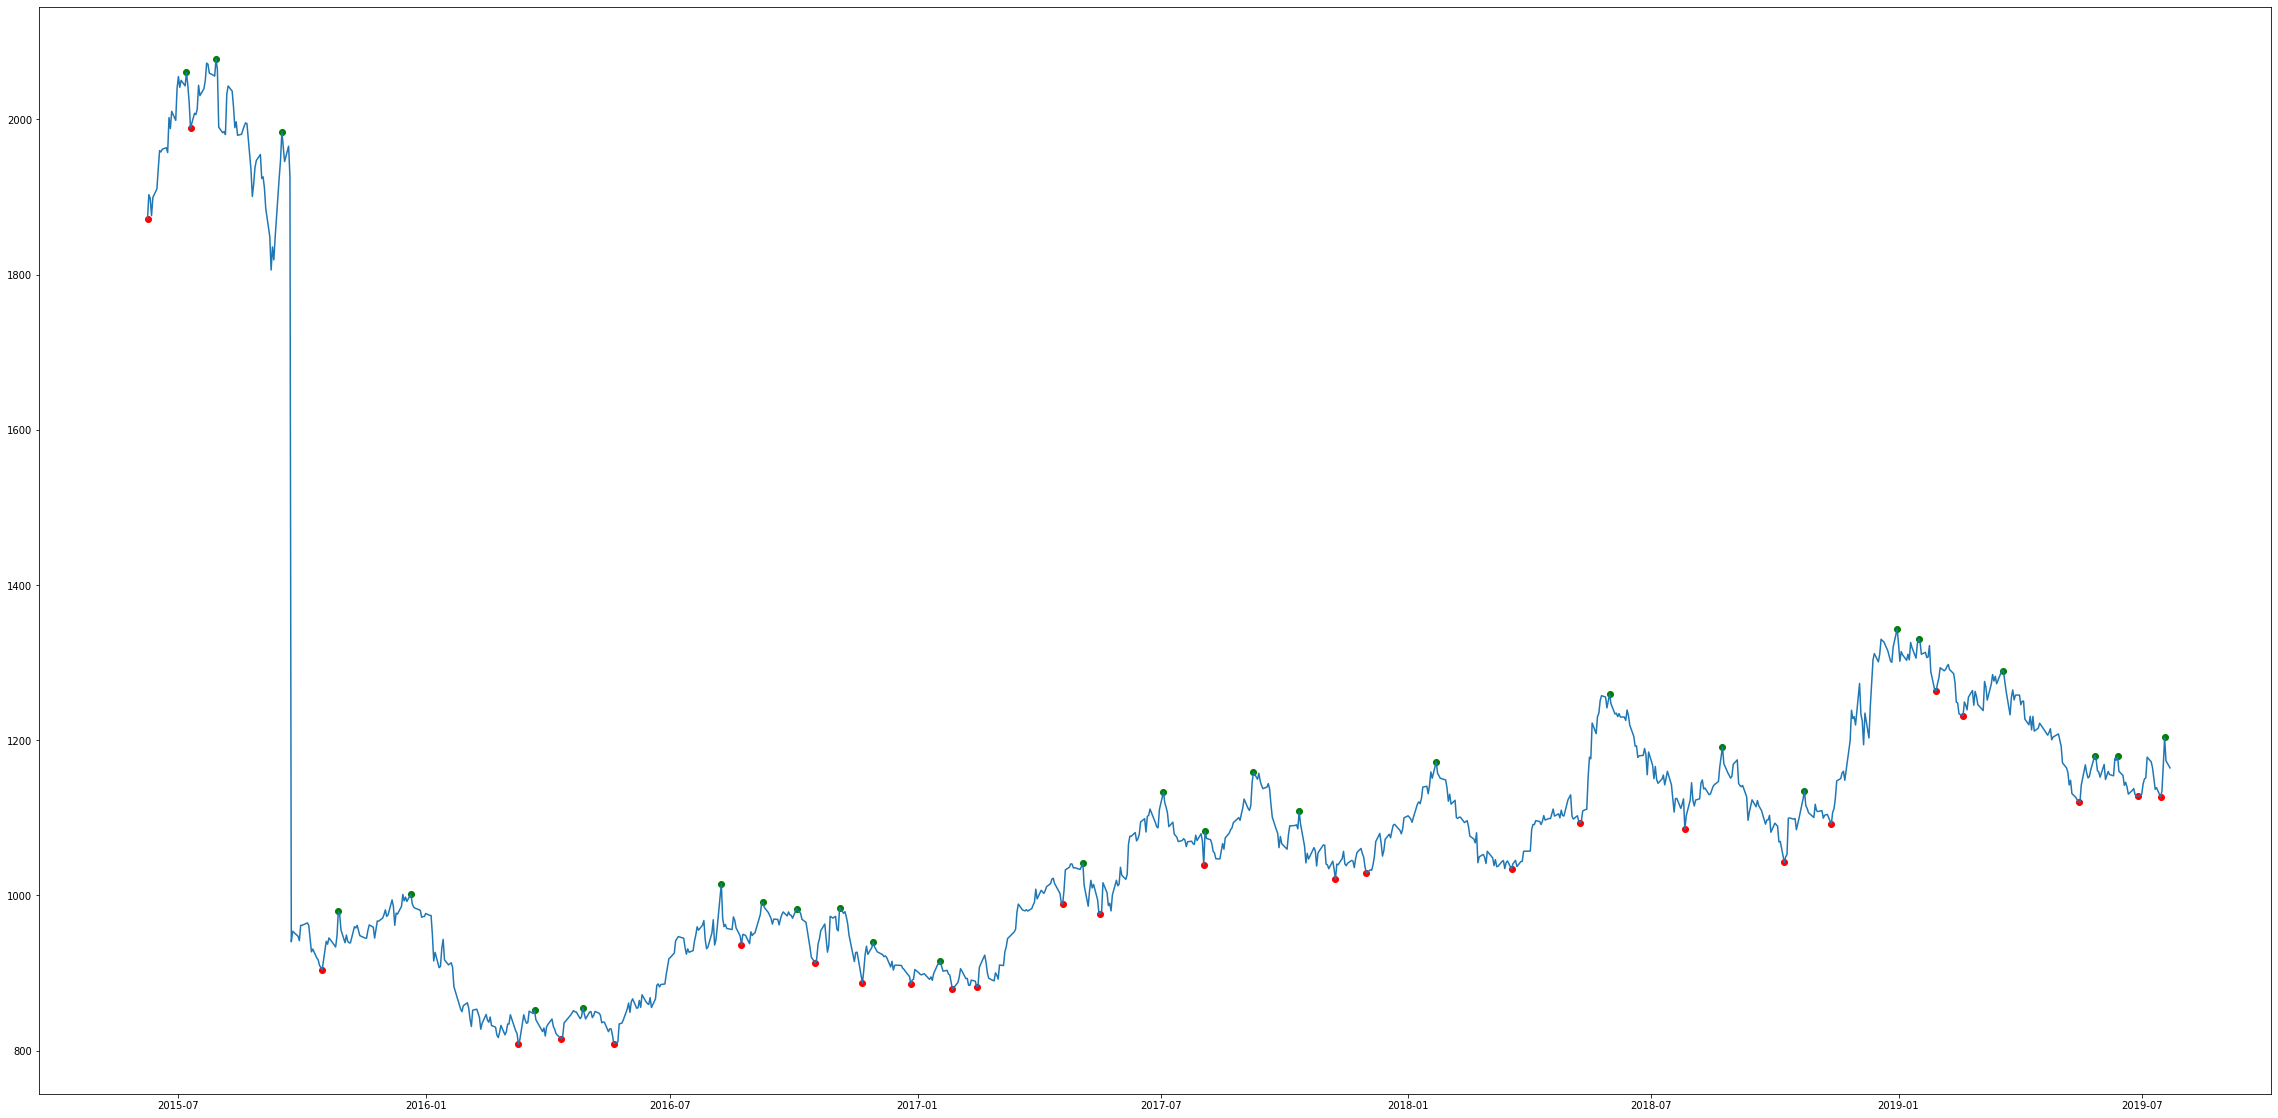

In [23]:
plt.scatter(df_colpal.timestamp, df_colpal['min'], c='r')
plt.scatter(df_colpal.timestamp, df_colpal['max'], c='g')
plt.plot(df_colpal.timestamp, df_colpal['close'])
plt.show()

In [24]:
df_colpal.head()

,timestamp,close,min,max
0,2015-06-08,1871.55,1871.55,NaN
1,2015-06-09,1902.90,NaN,NaN
2,2015-06-10,1898.35,NaN,NaN
3,2015-06-11,1876.00,NaN,NaN
4,2015-06-12,1899.50,NaN,NaN
